In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('exchange_rate.csv', parse_dates=[0])
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [3]:
df.columns = ['Date', 'USD_AUD']
df.set_index('Date', inplace=True)
df.head()

,USD_AUD
Date,
01-01-1990 00:00,0.7855
02-01-1990 00:00,0.7818
03-01-1990 00:00,0.7867
04-01-1990 00:00,0.7860
05-01-1990 00:00,0.7849


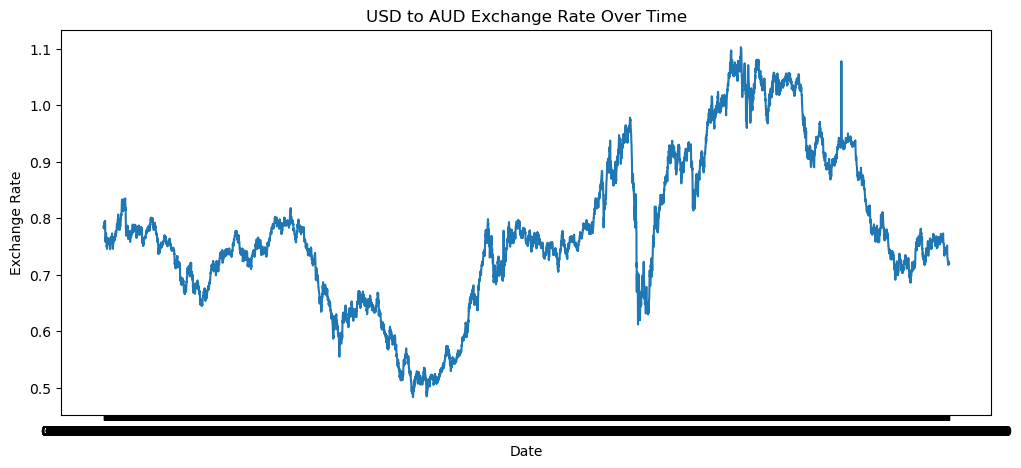

In [4]:
plt.figure(figsize=(12,5))
plt.plot(df['USD_AUD'])
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

In [5]:
df.isnull().sum()

USD_AUD    0
dtype: int64

In [6]:
df = df.ffill()

In [7]:
train = df.iloc[:-30]
test = df.iloc[-30:]

In [8]:
adf_result = adfuller(train['USD_AUD'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

ADF Statistic: -1.6765058667526558
p-value: 0.443256192908529


In [9]:
train_diff = train['USD_AUD'].diff().dropna()

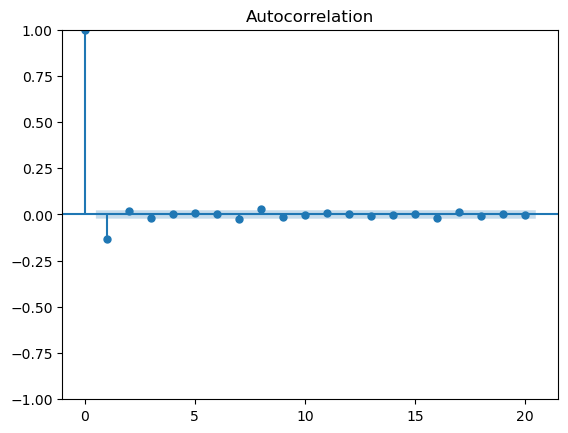

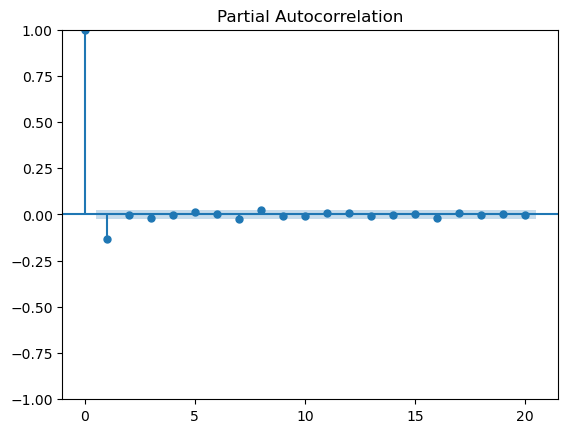

In [10]:
plot_acf(train_diff, lags=20)
plot_pacf(train_diff, lags=20)
plt.show()

In [11]:
arima_model = ARIMA(train['USD_AUD'], order=(1,1,1))
arima_fit = arima_model.fit()
arima_fit.summary()

C:\Users\KAPIL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\KAPIL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\KAPIL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                USD_AUD   No. Observations:                 7558
Model:                 ARIMA(1, 1, 1)   Log Likelihood               27934.471
Date:                Thu, 01 Jan 2026   AIC                         -55862.942
Time:                        00:38:12   BIC                         -55842.152
Sample:                             0   HQIC                        -55855.806
                               - 7558                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1262      0.045     -2.783      0.005      -0.215      -0.037
ma.L1         -0.0056      0.045     -0.123      0.902      -0.095       0.083
sigma2      3.604e-05   9.99e-08    360.760      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2846316.17
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.98   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

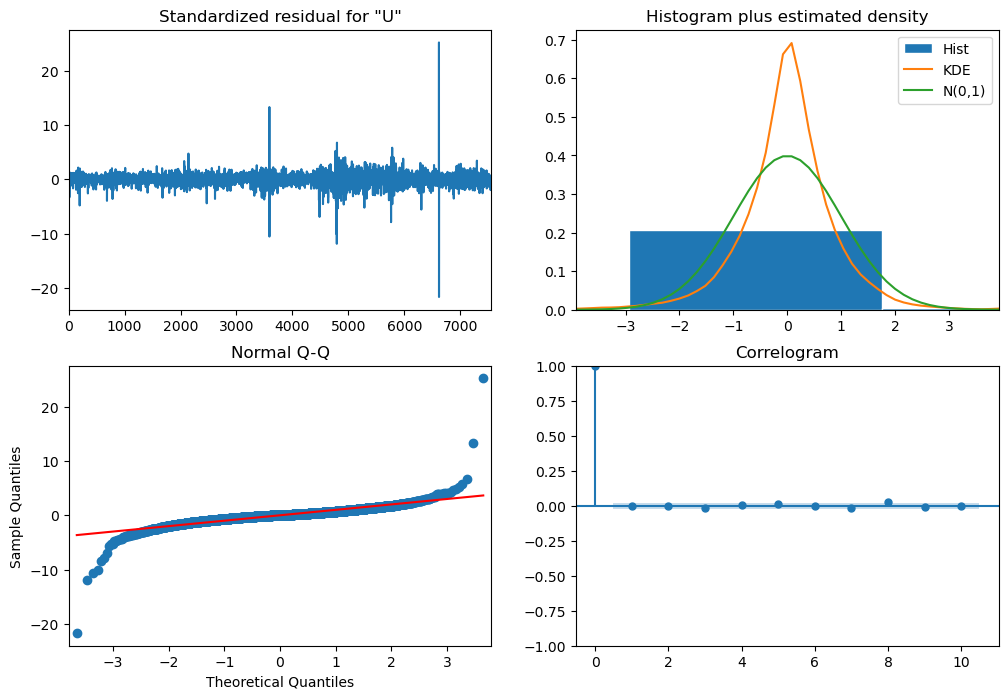

In [12]:
arima_fit.plot_diagnostics(figsize=(12,8))
plt.show()

In [13]:
arima_forecast = arima_fit.forecast(steps=30)

C:\Users\KAPIL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\KAPIL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


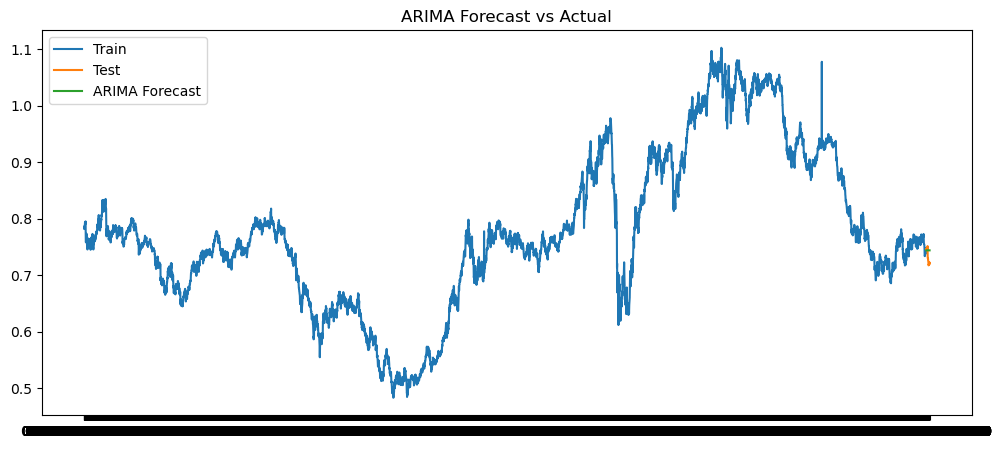

In [14]:
plt.figure(figsize=(12,5))
plt.plot(train.index, train['USD_AUD'], label='Train')
plt.plot(test.index, test['USD_AUD'], label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.title('ARIMA Forecast vs Actual')
plt.show()

In [15]:
ets_model = ExponentialSmoothing(
train['USD_AUD'],
trend='add',
seasonal=None
)
ets_fit = ets_model.fit()

C:\Users\KAPIL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [16]:
ets_forecast = ets_fit.forecast(steps=30)

C:\Users\KAPIL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\KAPIL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


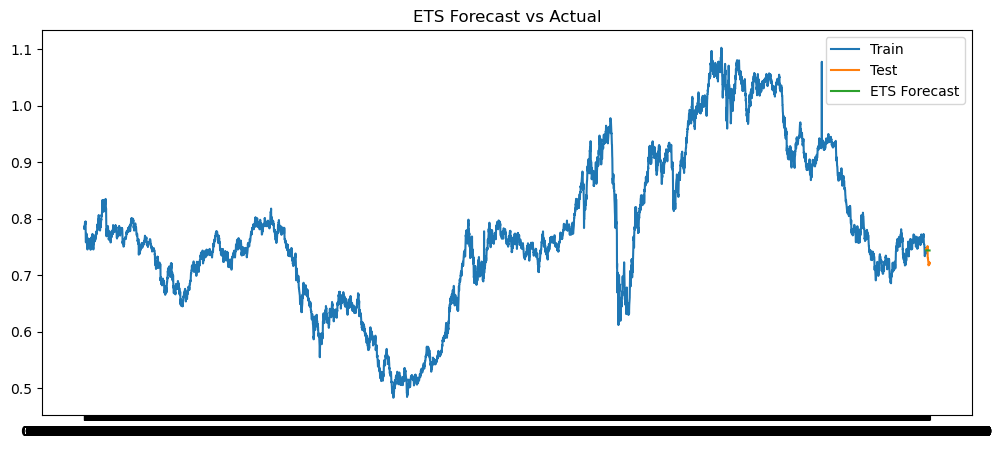

In [17]:
plt.figure(figsize=(12,5))
plt.plot(train.index, train['USD_AUD'], label='Train')
plt.plot(test.index, test['USD_AUD'], label='Test')
plt.plot(test.index, ets_forecast, label='ETS Forecast')
plt.legend()
plt.title('ETS Forecast vs Actual')
plt.show()

In [21]:
def evaluate(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape

arima_mae, arima_rmse, arima_mape = evaluate(test['USD_AUD'], arima_forecast)
ets_mae, ets_rmse, ets_mape = evaluate(test['USD_AUD'], ets_forecast)

pd.DataFrame({
    'Model': ['ARIMA', 'ETS'],
    'MAE': [arima_mae, ets_mae],
    'RMSE': [arima_rmse, ets_rmse],
    'MAPE': [arima_mape, ets_mape]
})

,Model,MAE,RMSE,MAPE
0,ARIMA,0.013495,0.016632,NaN
1,ETS,0.013425,0.016500,NaN
